# 7- Analyzing Real Data



In [2]:
import pandas as pd

### Questions

* How do you visualize data from a `DataFrame`?
* How do you group data by year and month?
* How do you plot multiple measurements in a single plot?

### Objectives

* Learn how to plot the cleaned data.
* Learn how to subset and plot the data.
* Learn how to use the groupby method to visualize information.

In [8]:
# This recovers the previously define dataframe
df = pd.read_csv("data/hot_dogs_data.csv", 
                 na_values=-9, 
                 index_col="botid #").drop(columns=[" "])

df["date"] = pd.to_datetime(df['date mmddyy'], format='%m%d%y')
df = df.drop(columns=["date mmddyy"])
df = df.drop(columns=["no2 nmol/kg"])
df.head(3)

,press dbar,temp ITS-90,csal PSS-78,coxy umol/kg,ph,phos umol/kg,nit umol/kg,doc umol/kg,hbact #*1e5/ml,pbact #*1e5/ml,sbact #*1e5/ml,date
botid #,,,,,,,,,,,,
2190200124,5.5,23.0629,35.2514,214.1,NaN,0.10,0.03,NaN,NaN,NaN,NaN,2010-03-09
2190200123,59.6,23.0670,35.2506,214.6,NaN,0.11,0.06,NaN,NaN,NaN,NaN,2010-03-09
2190200122,90.7,21.7697,35.1897,213.4,NaN,0.12,0.08,NaN,NaN,NaN,NaN,2010-03-09


### Plotting Temperature

* The plotting library `matplotlib` can be invoked using the `plot` of a `DataFrame` 
  * Facilitate plotting.
    * More info on plotting during the DataViz Workshop (2/24)
* `plot` takes `x` and `y` and `kind` (e.g., line or scatter)
```python
df.plot(x="date", y="temp ITS-90", kind="line")
```
* See [Pandas documentation page](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)) for more info on the `plot` method .

<AxesSubplot: xlabel='date'>

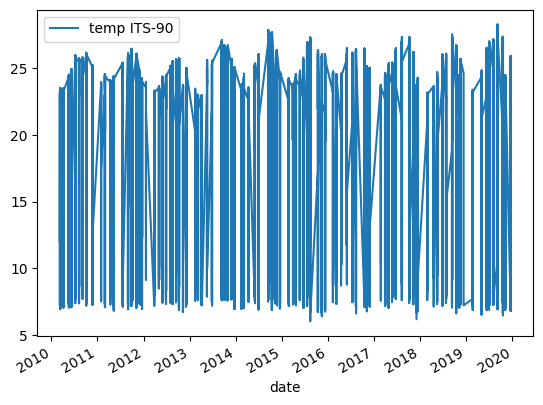

In [10]:
# Plottong all the temp values leading to 
# an overwhelming and incomprehensible graph
df.plot(x="date", y="temp ITS-90", kind="line")

<AxesSubplot: xlabel='date', ylabel='temp ITS-90'>

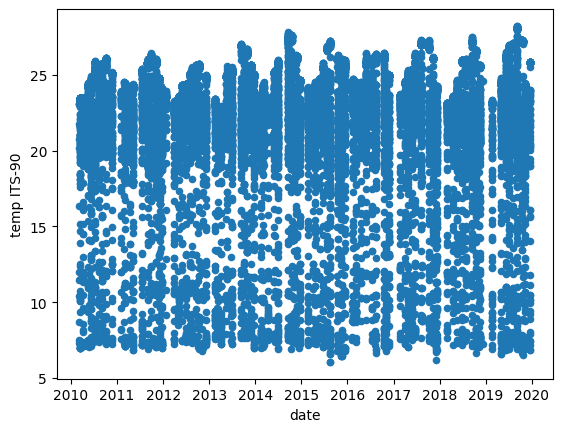

In [11]:
# Plottong all the temp values leading to 
# an overwhelming and incomprehensible graph
df.plot(x="date", y="temp ITS-90", kind="scatter")

### Plotting  a Subset of the Data

* One way to reduce the size of the data plotted is by selecting a subset of the data.
  * E.g., select all the values for which pressure in decibars is less than 100?
  * plot the resulting subset

```python
surface_samples = df[df["press dbar"] < 100]
```

<AxesSubplot: xlabel='date', ylabel='temp ITS-90'>

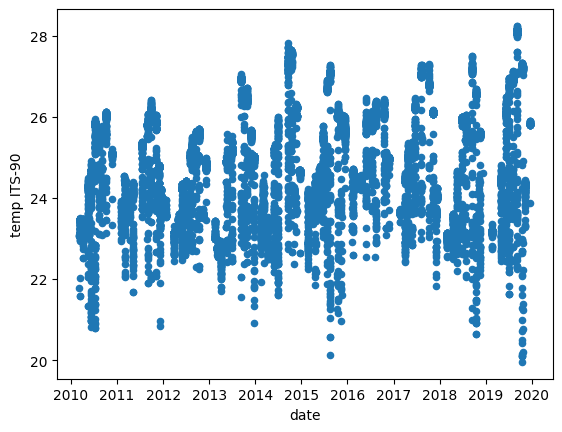

In [12]:
surface_samples = df[df["press dbar"] < 100]
surface_samples.plot(x="date", y="temp ITS-90", kind="scatter")

### Using GroupBy to Summarize Data

* Subsetting can be useful for identifying localized trends. 
* Grouping the data by a variable is also a helpful way to reduce the complexity of a data set
* Grouping the data using a time component is often very useful when coring with time series such as this one.
  * E.g., compute the average temperature by year.
* use the `groupby` method, which allows us to group the data using one or more column
* We can then reduce each group to some single observation, e.g., `mean()` temperature in each group.



In [13]:
surface_samples.describe()

,press dbar,temp ITS-90,csal PSS-78,coxy umol/kg,ph,phos umol/kg,nit umol/kg,doc umol/kg,hbact #*1e5/ml,pbact #*1e5/ml,sbact #*1e5/ml
count,11307.000000,11307.000000,11299.000000,1765.000000,412.000000,955.000000,951.000000,427.000000,400.000000,399.000000,400.000000
mean,38.278297,24.664788,35.141773,211.241473,8.065393,0.072126,0.030810,72.091030,4.743103,2.075579,0.017788
std,29.217111,1.329079,0.209144,5.338254,0.014376,0.034912,0.063841,2.889475,0.731505,0.433525,0.011100
min,0.800000,19.955800,34.457100,192.100000,7.993000,0.000000,0.000000,56.430000,3.037000,0.665000,0.000000
25%,8.000000,23.608950,35.004900,207.600000,8.059000,0.040000,0.010000,70.595000,4.162500,1.792500,0.011000
50%,25.800000,24.576200,35.170300,211.000000,8.066000,0.070000,0.020000,72.320000,4.700500,2.084000,0.015000
75%,65.750000,25.662850,35.294400,214.300000,8.075000,0.090000,0.040000,73.730000,5.196250,2.356500,0.022000
max,99.900000,28.240100,35.556400,230.900000,8.105000,0.220000,1.540000,80.460000,7.889000,3.555000,0.091000


In [14]:
surface_samples_by_year = surface_samples.groupby(df.date.dt.year)
surface_samples_by_year.count()


,press dbar,temp ITS-90,csal PSS-78,coxy umol/kg,ph,phos umol/kg,nit umol/kg,doc umol/kg,hbact #*1e5/ml,pbact #*1e5/ml,sbact #*1e5/ml,date
date,,,,,,,,,,,,
2010,1293,1293,1293,166,39,101,101,65,37,37,37,1293
2011,1391,1391,1383,189,45,110,112,5,49,49,49,1391
2012,1126,1126,1126,160,43,107,107,62,37,37,37,1126
2013,1131,1131,1131,189,41,106,106,63,37,37,37,1131
2014,1122,1122,1122,195,42,117,115,55,41,41,41,1122
2015,1206,1206,1206,209,41,117,114,65,44,44,44,1206
2016,986,986,986,177,38,37,37,61,34,34,34,986
2017,1118,1118,1118,176,49,112,111,51,41,41,41,1118
2018,825,825,825,143,32,41,40,0,38,37,38,825


In [17]:
surface_samples_by_year = surface_samples.groupby(
    df.date.dt.year
)["temp ITS-90"].mean()

surface_samples_by_year

date
2010    24.438342
2011    24.545986
2012    24.286195
2013    24.449899
2014    24.755485
2015    24.799153
2016    24.940249
2017    24.836940
2018    24.580730
2019    25.087561
Name: temp ITS-90, dtype: float64

### Exercise 1: Plotting Yearly Surface Temperature

Can you plot the yearly surface temperature from `surface_samples_by_year`. 

1. Use the `plot` method on `surface_samples_by_year` 

2. Modify `plot` so that it uses lines instead of scatter.

3. The resulting plot should look like the one below.



<AxesSubplot: xlabel='date'>

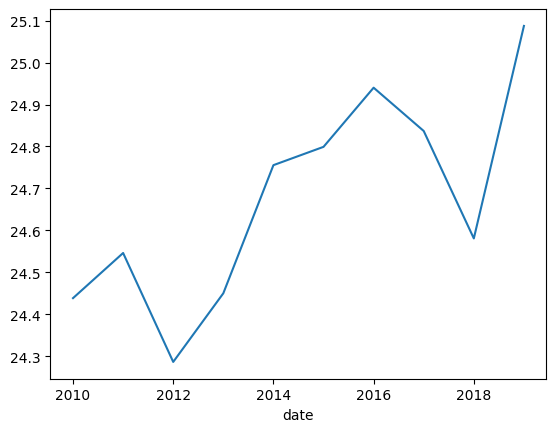

### Using GroupBy to Group Two or More Columns

* The previous `groupby` smoothed out any month-to-month variations that are present in the data.
* Instead of grouping by year only, we can use the 'groupby' method to group by year and month.

```python
surface_samples.groupby([surface_samples.date.dt.year, surface_samples.date.dt.month])
```

In [16]:
surface_samples_year_month = surface_samples.groupby(
    [surface_samples.date.dt.year, surface_samples.date.dt.month]
)["temp ITS-90"]

surface_samples_year_month.describe()

count       mean       std      min        25%       50%  \
date date                                                             
2010 3     161.0  23.316618  0.291624  21.5728  23.225800  23.42880   
     4     136.0  23.231985  0.183732  22.5254  23.211525  23.24295   
     5     147.0  23.787439  0.672333  21.3467  23.212400  24.19490   
     6     153.0  23.620556  1.375263  20.8118  22.264900  24.50790   
     7     176.0  24.834982  1.509353  20.7876  25.018350  25.54655   
...          ...        ...       ...      ...        ...       ...   
2019 8     134.0  26.006258  1.383448  22.4405  24.615725  26.88450   
     9     132.0  26.412903  2.072901  22.2535  24.407000  28.00345   
     10    106.0  25.590081  2.581801  19.9558  22.968850  27.18420   
     11    125.0  24.217688  0.227297  23.2836  24.189700  24.28560   
     12     53.0  25.790132  0.270196  23.8684  25.812300  25.81860   

                 75%      max  
date date                      
2010 3     23.460800  23.4971  
     4     23.350450  23.4856  
     5     24.283850  24.4841  
     6     24.607200  24.9107  
     7     25.787500  25.9497  
...              ...      ...  
2019 8     26.928700  27.1246  
     9     28.105375  28.2401  
     10    27.261950  27.3231  
     11    24.332700  24.4463  
     12    25.832200  25.8898  

[94 rows x 8 columns]

In [26]:
surface_samples_year_month.mean()

date  date
2010  3       23.316618
      4       23.231985
      5       23.787439
      6       23.620556
      7       24.834982
                ...    
2019  8       26.006258
      9       26.412903
      10      25.590081
      11      24.217688
      12      25.790132
Name: temp ITS-90, Length: 94, dtype: float64

In [29]:
mean_surface_samples_year_month = surface_samples_year_month.mean()

<AxesSubplot: xlabel='date,date'>

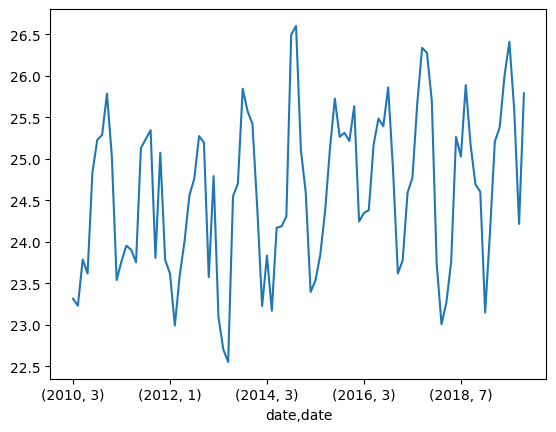

In [30]:
mean_surface_samples_year_month.plot(y="temp ITS-90", kind="line")

### Exercise 2: Synthesis

* Reuse the code above to produce a line plot of the monthly median (not average as computed above) for the `press dbar` variable.

<AxesSubplot: xlabel='date,date'>

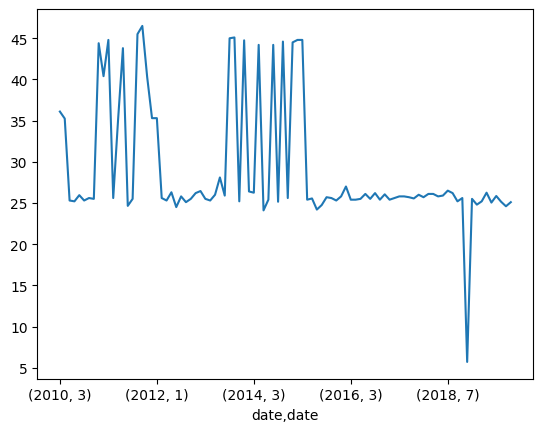

### Key Points

* Simple plots can be created using the plot method on `DataFrames`.

* Grouping data is a powerful way to summarize data based on one or more variables

  * Typically used to aggregate data and generate descriptive statistics, such as mean, median, and standard deviation, for each group.

